In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [23]:
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
             "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]
filepath = "../Data/President Ratings/"


In [26]:
#Approval Ratings
Approval_Ratings = pd.DataFrame()

for i in range(len(Presidents)):
    Approval_Rating = pd.read_csv(f"{filepath}{Presidents[i]}-Ratings.csv")
    Approval_Ratings = pd.concat([Approval_Ratings,Approval_Rating],ignore_index = True)
    
Approval_Ratings.set_index(Approval_Ratings["End Date"])

,Start Date,End Date,Approving,Disapproving,Unsure/NoData,Year,Month
End Date,,,,,,,
2018-10-14,10/08/2018,2018-10-14,44,51,5,2018,10
2018-10-07,10/01/2018,2018-10-07,43,53,4,2018,10
2018-09-30,09/24/2018,2018-09-30,42,53,5,2018,9
2018-09-23,09/17/2018,2018-09-23,40,56,4,2018,9
2018-09-16,09/10/2018,2018-09-16,38,56,6,2018,9
...,...,...,...,...,...,...,...
1969-04-10,04/04/1969,1969-04-10,59,11,28,1969,4
1969-04-01,03/27/1969,1969-04-01,62,10,27,1969,4
1969-03-17,03/12/1969,1969-03-17,65,8,26,1969,3


In [27]:
#Clean up Approval Ratings

Average_Month_Approval_Ratings = Approval_Ratings.groupby(['Year','Month']).mean().reset_index()
Average_Month_Approval_Ratings.head()

,Year,Month,Approving,Disapproving,Unsure/NoData
0,1969,1,59.0,5.000000,36.000000
1,1969,2,59.0,6.000000,34.000000
2,1969,3,65.0,8.000000,26.000000
3,1969,4,59.0,16.000000,23.333333
4,1969,5,61.0,13.333333,24.333333


In [5]:
#Get Unemployment Data
filepath = "../Data/Unemployment Data.csv"
Unemployment_Data = pd.read_csv(filepath)
Unemployment_Data

,Years,Months,Unemployment Rate
0,2019,9,3.5
1,2019,8,3.7
2,2019,7,3.7
3,2019,6,3.7
4,2019,5,3.6
...,...,...,...
712,1960,5,5.1
713,1960,4,5.2
714,1960,3,5.4
715,1960,2,4.8


In [6]:
Total_Data = pd.merge(Average_Month_Approval_Ratings,Unemployment_Data, how = "inner", 
                      left_on=["Year","Month"], right_on=["Years","Months"])

In [7]:
Total_Data

,Approving,Disapproving,Unsure/NoData,Years,Months,Unemployment Rate
0,59.00,5.000000,36.000000,1969,1,3.4
1,59.00,6.000000,34.000000,1969,2,3.4
2,65.00,8.000000,26.000000,1969,3,3.4
3,59.00,16.000000,23.333333,1969,4,3.4
4,61.00,13.333333,24.333333,1969,5,3.4
...,...,...,...,...,...,...
565,42.25,53.500000,4.250000,2018,6,4.0
566,41.60,54.000000,4.400000,2018,7,3.9
567,40.75,54.000000,5.250000,2018,8,3.8
568,40.20,54.400000,5.400000,2018,9,3.7


Text(0.5, 1.0, 'Unemployment Rate vs Presidential Approval Rating')

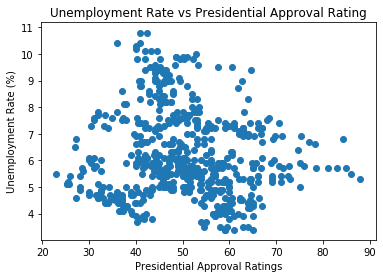

In [8]:
plt.scatter(Total_Data["Approving"],Total_Data["Unemployment Rate"])
plt.xlabel("Presidential Approval Ratings")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs Presidential Approval Rating")

In [11]:
Total_Data["M/Y"] = 
Total_Data

TypeError: 'Series' objects are mutable, thus they cannot be hashed